In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import nltk

In [21]:
nltk.download_shell()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        Upaddhyay\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
messages =  [line.rstrip() for line in open('SMSSpamCollection')]

In [4]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
messages = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [8]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [91]:
messages["length"] = messages['message'].apply(len)

In [92]:
def impute_label(col):
    if col == 'spam':
        return 1;
    else:
        return 0;

In [93]:
messages['label_numeric'] = messages['label'].apply(impute_label)

In [94]:
messages.head()

,label,message,length,label_numeric
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


<AxesSubplot:ylabel='Frequency'>

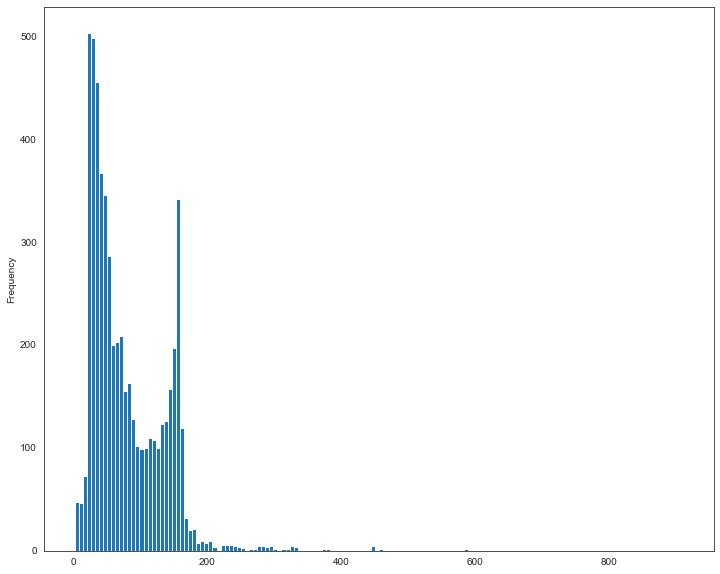

In [13]:
plt.figure(figsize=(12,10))
sns.set_style('white')
messages['length'].plot.hist(bins=150)

In [14]:
messages['length'].max()

910

In [15]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

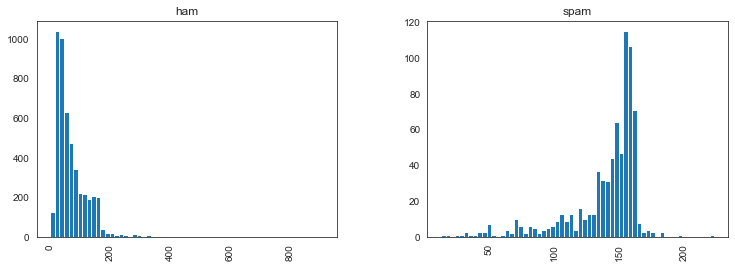

In [18]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

In [20]:
#Text Pre-Processing

In [22]:
import string 

In [23]:
mess = 'Sample Message ! Notice : it has punctuation.'

In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
no_punctutaion = [c for c in mess if c not in string.punctuation]

In [41]:
no_punctutaion

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [42]:
from nltk.corpus import stopwords

In [49]:
stop_word = stopwords.words('english')

In [50]:
stop_word

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
#Removing stop words
no_punctutaion = ''.join(no_punctutaion)

In [46]:
no_punctutaion

'Sample Message  Notice  it has punctuation'

In [47]:
no_punctutaion.split()

['Sample', 'Message', 'Notice', 'it', 'has', 'punctuation']

In [52]:
clean_mess =  [word for word in no_punctutaion.split() if word not in stop_word]

In [53]:
clean_mess

['Sample', 'Message', 'Notice', 'punctuation']

In [58]:
def text_process(mess):
    #Removing Punctuation
    no_punc = [char for char in mess if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    #Removing stop words
    clean_mess = [w for w in no_punc.split() if w.lower() not in stopwords.words('english')]
    return clean_mess

In [60]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [61]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
#Vectoriaztion
#Currently, we have the messages as lists of tokens (also known as lemmas) 
#and now we need to convert each of those messages into a vector 
#so that the SciKit Learn's algorithm models can work with the vector.

#We'll do that in three steps using the bag-of-words model:

#Count how many times does a word occur in each message (Known as term frequency)

#Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

#Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

In [81]:
#bow stands for Bag of Words
#Each vector will have as many dimensions as there are unique words in the SMS corpus.
#We will first use SciKit Learn's CountVectorizer. 
#This model will convert a collection of text documents to a matrix of token counts.
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [64]:
# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [65]:
mess4 = messages['message'][3]

In [66]:
print(mess4)

U dun say so early hor... U c already then say...


In [67]:
bow4 = bow_transformer.transform([mess4])

In [82]:
# vector representation of 4 th message
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [69]:
print(bow4.shape)

(1, 11425)


In [70]:
bow_transformer.get_feature_names()[4068]

'U'

In [71]:
bow_transformer.get_feature_names()[9554]

'say'

In [73]:
#Transforming the mesaages using the model into a vector
messages_bow = bow_transformer.transform(messages['message'])

In [83]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [76]:
from sklearn.feature_extraction.text import TfidfTransformer

In [78]:
tf_idf_transformer = TfidfTransformer().fit(messages_bow)

In [79]:
tfidf4 = tf_idf_transformer.transform(bow4)

In [84]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [87]:
tf_idf_transformer.idf_[bow_transformer.vocabulary_['university']]


8.527076498901426

In [88]:
messages_tfidf = tf_idf_transformer.transform(messages_bow)

In [89]:
from sklearn.naive_bayes import MultinomialNB

In [99]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [100]:
spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [101]:
messages['label_numeric'][3]

0

In [102]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [103]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size = 0.3)

In [106]:
msg_train

4116    Sorry. You never hear unless you book it. One ...
2367    Tone Club: Your subs has now expired 2 re-sub ...
306     Yup... From what i remb... I think should be c...
2660                                                Ok...
1643                             Sleeping nt feeling well
                              ...                        
2451                              K..give back my thanks.
3566    We know TAJ MAHAL as symbol of love. But the o...
5171                         Oh k. . I will come tomorrow
5227    I re-met alex nichols from middle school and i...
1848    FREE NOKIA Or Motorola with upto 12mths 1/2pri...
Name: message, Length: 3900, dtype: object

In [107]:
from sklearn.pipeline import Pipeline

In [109]:
pipeline = Pipeline([
        ('bow',CountVectorizer(analyzer=text_process)),
        ('tfidf',TfidfTransformer()),
        ('classifier',MultinomialNB())
])

In [110]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000237184363A0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [111]:
pred = pipeline.predict(msg_test)

In [112]:
from sklearn.metrics import classification_report,confusion_matrix

In [113]:
print(classification_report(label_test,pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1446
        spam       1.00      0.69      0.82       226

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



In [114]:
print(confusion_matrix(label_test,pred))

[[1446    0]
 [  69  157]]


In [115]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
pipeline_rfc = Pipeline([
        ('bow',CountVectorizer(analyzer=text_process)),
        ('tfidf',TfidfTransformer()),
        ('classifier',RandomForestClassifier())
])

In [118]:
pipeline_rfc.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000237184363A0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [119]:
pred_rfc = pipeline.predict(msg_test)

In [120]:
print(classification_report(label_test,pred_rfc))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1446
        spam       1.00      0.69      0.82       226

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672

